# Final Assignment - Part 2

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021:

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import requests
import re
import glob
import csv

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other.

    What is the **shape** of the `fnd` DataFrame?

In [2]:
all_files = glob.glob('data/Final Assignment P2 csv/startup_funding*.csv')
all_files

['data/Final Assignment P2 csv\\startup_funding2019.csv',
 'data/Final Assignment P2 csv\\startup_funding2020.csv',
 'data/Final Assignment P2 csv\\startup_funding2021.csv']

In [3]:
fnd = []
for file_name in all_files:
    df_tmp = pd.read_csv(file_name, index_col=None, header=0)
    year = int(file_name.split('startup_funding')[1][:4])
    df_tmp['Year'] = year
    fnd.append(df_tmp)

In [4]:
fnd = pd.concat(fnd, ignore_index=True)

In [5]:
fnd.sample(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
1030,Kuku FM,NaN,Mumbai,Media,A podcast platform,"Lal Chand Bisu, Vikas Goyal, Vinod Kumar Meena",Vertex Ventures,"$5,500,000",Series A,2020
2057,Mindhouse,2019,Gurugram,"Health, Wellness & Fitness",Mindhouse is a Yoga & Nutrition driven persona...,"Pooja Khanna, Pankaj Chaddah","Binny Bansal, General Catalyst",$6000000,Seed,2021
2295,Genext Students,2013,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,Undisclosed,NaN,2021
2258,FrontRow,2020,Bangalore,E-learning,FrontRow enables everyone to pursue their pass...,"Shubhadit Sharma, Mikhil Raj, Ishaan Preet Singh","Eight Roads Ventures, GSV",$14000000,Series A,2021
1896,Livve Homes,2017,Bangalore,Rental space,"India's homegrown online portal, championing t...",Maya Lakshman,Angel investors,"$5,000,000",NaN,2021
483,Penny,2020,Riyadh,SaaS startup,Offer various development solutions and mainly...,"Iyad Aldalooj, Majid Aldalooj, Mohammed Ibrahim",NaN,"$1,300,000",Seed,2020
11,Appnomic,NaN,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,"$22,000,000",NaN,2019
1840,Powerhouse91,2020,Gurugram,Consumer goods,"A tech-driven company that acquires, operates,...","Shashwat Diesh, Aqib Mohammed",Crossbeam Venture Partners,Undisclosed,Seed,2021
1451,Infra.Market,2016,Thane,Construction,Infra.Market is an online procurement marketpl...,"Aaditya Sharda, Souvik Sengupta","InnoVen Capital, Nexus Venture Partners","$100,000,000",NaN,2021
988,Yolo,2019,Gurugram,Transport,Intercity transportation,"Shailesh Gupta, Mukul Shah, Danish Chopra",Undisclosed,"$600,000",Seed funding,2020


In [6]:
fnd.shape

(2343, 10)

In [7]:
# the shape is (2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types.

    What is the **total** `Amount($)` of funding given in the three years available?

In [8]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 183.2+ KB


In [9]:
fnd['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001', 2021,
       2020, 1993, 1999, 1989, 2009, 2002, 1994, 2006, 2000, 2007, 1978,
       2003, 1998, 1991, 1984, 2005, 1963], dtype=object)

In [10]:
fnd['Founded'] = pd.to_numeric(fnd['Founded'], errors='coerce')

In [11]:
fnd['Founded'] = fnd['Founded'].fillna(0)

In [12]:
fnd['Founded'] = fnd['Founded'].astype(np.int64)

In [13]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 183.2+ KB


In [14]:
fnd['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000', '$200,000', '$340,000', '$45,000,000', '$1,200,000',
       '$660,000,000', '$120,000', '$7,500,000', '$500,000', '$3,000,000',
       '$10,000,000', '$145,000,000', '$21,000,000', '$560,000'

In [15]:
fnd['Amount($)'] = fnd['Amount($)'].replace({'\$':'', ',':'', 'Undisclosed':np.nan, 'nan':np.nan}, regex=True)
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'], errors='coerce')

In [16]:
fnd['Amount($)'] = fnd['Amount($)'].fillna(0)
fnd['Amount($)'] = fnd['Amount($)'].astype(np.int64)

In [17]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2343 non-null   int64 
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 183.2+ KB


In [18]:
fnd['Amount($)'].sum()

271544633855

In [19]:
# total founding given is 271.544.633.855$

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [20]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [21]:
fnd_2020 = fnd[fnd['Year'] == 2020]

In [22]:
fnd_2020.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(10)

,Investor,size
789,Venture Catalysts,20
484,Mumbai Angels Network,12
85,Angel investors,12
334,Inflection Point Ventures,11
769,Undisclosed,10
657,Sequoia India,6
770,Unicorn India Ventures,6
143,Better Capital,5
757,Trifecta Capital,5
72,Alteria Capital,4


In [23]:
# Inflection Point Ventures ranked 4th in 2020

4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**:
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame:
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?

In [24]:
sps = pd.read_csv('data/Software Professionals Salary.csv')
sps.sample(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1665,3.8,Wipro,Android Developer,288000,2,New Delhi,Full Time,Android
19244,3.3,Fiserv,Software Development Engineer II,1000000,1,Pune,Full Time,SDE
6798,4.3,Velocitai Digital,Front End Developer,276000,1,New Delhi,Full Time,Frontend
15446,3.7,Kumaran Systems,Software Development Engineer In Test (SDET),288000,1,Hyderabad,Full Time,SDE
1091,4.0,IStrides,Android Developer,288000,1,Chennai,Full Time,Android
20965,4.1,Coforge,Test Engineer,348000,2,Bangalore,Full Time,Testing
13958,4.2,Spritle Software,Software Development Engineer,876000,1,Chennai,Full Time,SDE
20170,3.9,KH TEC,Test Engineer - Intern,6600000,1,Hyderabad,Intern,Testing
9396,4.7,Inmakes Software Solutions,Junior Java Developer,300000,1,Chennai,Full Time,Java
19145,3.3,Fiserv,Software Development Engineer (SDE),800000,2,Pune,Full Time,SDE


In [25]:
# 1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
sps_loc = sps.groupby('Location', as_index=False)[['Rating', 'Salary']].mean()
sps_loc

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [26]:
# 2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset for the year 2021, the total number of `Company/Brand`s funded and the total `Amount($)` invested;

In [27]:
fnd_2021 = fnd[fnd['Year']== 2021]
fnd_2021.sample(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
2338,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1357,PlanetSpark,2017,Gurugram,Education Management,PlanetSpark is building the World Leader in Co...,"Maneesh Dhooper, Kunal Malik","Binny Bansal, Deep Kalra, Dr Ashish Gupta, Gok...",13000000,Series B,2021
1556,Paperfly,2016,Bangalore,E-commerce,Paperfly is an e-commerce fulfillment and nati...,"Shahriar Hasan, Md Razibul Islam, Rahath Ahmed...",Ecom Express,11000000,NaN,2021
2245,Klub,2019,Bangalore,Financial Services,"A team of fintech, investment banking, venture...","Anurakt Jain, Ishita Verma",Trifecta Capital,2000000,Debt,2021
1612,Zingbus,2019,Gurugram,Mobility,Zingbus is a renowned brand in the bus operati...,"Mratunjay, Prashant Kumar, Ravi Kumar Verma",Infoedge ventures,5000000,NaN,2021
2224,Akudo,2020,Bangalore,Financial Services,A Learning-First Neobank for teenagers - Enabl...,"Lavika Aggarwal, Sajal Khanna, Jgaveer Gandhi","Y Combinator, JAFCO Asia, Incubate Fund India,...",4200000,Seed,2021
1356,CHARGE+ZONE,2018,Vadodara,Automotive,CHARGE+ZONE is a tech-driven EV Charging infra...,Kartikey Hariyani,Venture Catalysts,10000000,NaN,2021
1423,Kohbee,2019,Bangalore,E-learning,Kohbee is a mobile app for online trainers and...,"Rohan Sinha, Shashwat Aditya","Ankit Mehrotra, Saurabh Aggarwal",235000,NaN,2021
1865,DotPe,2019,Gurugram,FinTech,DotPe is a technology start-up providing a com...,"Anurag Gupta, Gyanesh Sharma, Shailaz Nag","PayU, Google",27000000,Series A,2021
2090,Kissan Pro,2021,Jharkhand,Farming,"Full stack solution on agri advisory, input pu...",Ravi Dasoundhi,EKKI,0,NaN,2021


In [28]:
fnd_loc = fnd_2021.groupby('HeadQuarter', as_index=False).agg({'Company/Brand': 'count', 'Amount($)': 'sum'})
fnd_loc

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4300000
1,Ahmedabad,11,198155000
2,Ambernath,1,0
3,Andheri,1,0
4,Bangalore,425,14327420000
...,...,...,...
64,The Nilgiris,1,200000
65,Thiruvananthapuram,1,0
66,Trivandrum,1,300000
67,Vadodara,1,10000000


In [29]:
# 3. merge the two DataFrames you just created so to keep just the cities that are in both datasets and save the results in a third DataFrame called `sps_fnd_loc` (note: make sure to use the correct type of join);
sps_loc.sample(5)

,Location,Rating,Salary
4,Kerala,3.885185,553577.481481
6,Madhya Pradesh,3.992258,677641.909677
3,Jaipur,3.940741,629135.802469
2,Hyderabad,3.914484,679099.157376
5,Kolkata,4.024719,710925.573034


In [30]:
sps_loc['Location'].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata',
       'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune'], dtype=object)

In [31]:
fnd_loc.sample(5)

,HeadQuarter,Company/Brand,Amount($)
60,Surat,2,100000
62,Telugana,1,1500000
32,Kochi,1,800000
14,"Faridabad, Haryana",2,102500000
31,Kanpur,1,0


In [32]:
fnd_loc['HeadQuarter'].unique()

array(['Ahmadabad', 'Ahmedabad', 'Ambernath', 'Andheri', 'Bangalore',
       'Beijing', 'Bhilwara', 'Bhubaneswar', 'Chandigarh', 'Chennai',
       'Cochin', 'Coimbatore', 'Computer Games', 'Faridabad',
       'Faridabad, Haryana', 'Food & Beverages', 'Gandhinagar',
       'Ghaziabad', 'Goa', 'Gujarat', 'Gurgaon', 'Gurugram',
       'Gurugram\t#REF!', 'Guwahati', 'Haryana', 'Hyderabad', 'Indore',
       'Information Technology & Services', 'Jaipur', 'Jharkhand',
       'Jodhpur', 'Kanpur', 'Kochi', 'Kolkata', 'Kottayam', 'London',
       'Lucknow', 'Mangalore', 'Mohali', 'Mountain View, CA', 'Mumbai',
       'Nagpur', 'New Delhi', 'New York', 'Noida', 'Odisha',
       'Online Media\t#REF!', 'Panaji', 'Panchkula', 'Patna', 'Powai',
       'Pune', 'Rajsamand', 'Ranchi', 'Roorkee', 'Samsitpur', 'Santra',
       'Satara', 'Silvassa', 'Small Towns, Andhra Pradesh', 'Surat',
       'Telangana', 'Telugana', 'Thane', 'The Nilgiris',
       'Thiruvananthapuram', 'Trivandrum', 'Vadodara', 'West B

In [33]:
sps_fnd_loc = fnd_loc.merge(sps_loc, how='inner', left_on='HeadQuarter', right_on='Location')
sps_fnd_loc

,HeadQuarter,Company/Brand,Amount($),Location,Rating,Salary
0,Bangalore,425,14327420000,Bangalore,3.920232,735344.739593
1,Chennai,40,717140000,Chennai,3.902726,584559.661513
2,Hyderabad,34,243960000,Hyderabad,3.914484,679099.157376
3,Jaipur,11,343300000,Jaipur,3.940741,629135.802469
4,Kolkata,5,28000000,Kolkata,4.024719,710925.573034
5,Mumbai,200,153830300000,Mumbai,3.881709,961180.368491
6,New Delhi,143,1673010000,New Delhi,3.943415,658756.735632
7,Pune,46,509070000,Pune,3.886082,690476.311153


In [34]:
# 4. using the `sps_fnd_loc` DataFrame:
#        1. delete the `HeadQuarter` column
#        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
#        3. delete the `Amount($)` column
#        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`

In [35]:
sps_fnd_loc.drop(columns=['HeadQuarter'], inplace=True)
sps_fnd_loc

,Company/Brand,Amount($),Location,Rating,Salary
0,425,14327420000,Bangalore,3.920232,735344.739593
1,40,717140000,Chennai,3.902726,584559.661513
2,34,243960000,Hyderabad,3.914484,679099.157376
3,11,343300000,Jaipur,3.940741,629135.802469
4,5,28000000,Kolkata,4.024719,710925.573034
5,200,153830300000,Mumbai,3.881709,961180.368491
6,143,1673010000,New Delhi,3.943415,658756.735632
7,46,509070000,Pune,3.886082,690476.311153


In [36]:
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)']/1000000
sps_fnd_loc

,Company/Brand,Amount($),Location,Rating,Salary,Amount($MM)
0,425,14327420000,Bangalore,3.920232,735344.739593,14327.42
1,40,717140000,Chennai,3.902726,584559.661513,717.14
2,34,243960000,Hyderabad,3.914484,679099.157376,243.96
3,11,343300000,Jaipur,3.940741,629135.802469,343.30
4,5,28000000,Kolkata,4.024719,710925.573034,28.00
5,200,153830300000,Mumbai,3.881709,961180.368491,153830.30
6,143,1673010000,New Delhi,3.943415,658756.735632,1673.01
7,46,509070000,Pune,3.886082,690476.311153,509.07


In [37]:
sps_fnd_loc.drop(columns=['Amount($)'], inplace=True)
sps_fnd_loc

,Company/Brand,Location,Rating,Salary,Amount($MM)
0,425,Bangalore,3.920232,735344.739593,14327.42
1,40,Chennai,3.902726,584559.661513,717.14
2,34,Hyderabad,3.914484,679099.157376,243.96
3,11,Jaipur,3.940741,629135.802469,343.30
4,5,Kolkata,4.024719,710925.573034,28.00
5,200,Mumbai,3.881709,961180.368491,153830.30
6,143,New Delhi,3.943415,658756.735632,1673.01
7,46,Pune,3.886082,690476.311153,509.07


In [38]:
sps_fnd_loc.rename(columns={
    'Location': 'City',
    'Rating': 'Average Rating',
    'Salary': 'Avg. Salary',
    'Company/Brand': 'Nr. Companies Funded',
    'Amount($MM)': 'Sum Funding ($MM)'
    }, inplace=True)
sps_fnd_loc

,Nr. Companies Funded,City,Average Rating,Avg. Salary,Sum Funding ($MM)
0,425,Bangalore,3.920232,735344.739593,14327.42
1,40,Chennai,3.902726,584559.661513,717.14
2,34,Hyderabad,3.914484,679099.157376,243.96
3,11,Jaipur,3.940741,629135.802469,343.30
4,5,Kolkata,4.024719,710925.573034,28.00
5,200,Mumbai,3.881709,961180.368491,153830.30
6,143,New Delhi,3.943415,658756.735632,1673.01
7,46,Pune,3.886082,690476.311153,509.07


In [39]:
# Look at the `City` that received the highest `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?
sps_fnd_loc.groupby('City', as_index=False)['Average Rating'].max().sort_values('Average Rating', ascending=False)

,City,Average Rating
4,Kolkata,4.024719
6,New Delhi,3.943415
3,Jaipur,3.940741
0,Bangalore,3.920232
2,Hyderabad,3.914484
1,Chennai,3.902726
7,Pune,3.886082
5,Mumbai,3.881709


In [40]:
# Kolkata is the city that received the highest average rating (4.024719) in 2021 with 5 companies founded

5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees?

<Axes: xlabel='Avg. Salary', ylabel='Sum Funding ($MM)'>

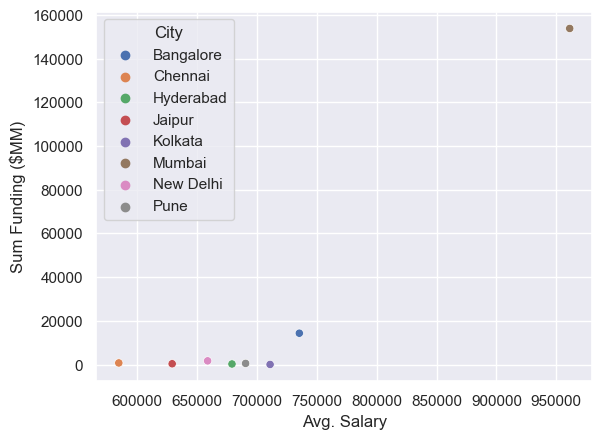

In [41]:
sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', hue='City', data=sps_fnd_loc)

In [155]:
# Mumbai is the city that stands out in terms of total funding received and average salary paid to their employees